In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#!python -m spacy download el_core_news_sm

In [28]:
nlp = spacy.load('el_core_news_sm')

In [29]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [13]:
tovima = pd.read_csv('/content/temp/tovima_full_articles.csv')

In [30]:
count_tovima = cv.fit_transform(tovima['full_text'])

In [32]:
results_tovima = pd.DataFrame(count_tovima.toarray(), columns=cv.get_feature_names_out())

In [43]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)

In [44]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(tovima['full_text'])

In [50]:
arr = cosine_similarity(tfidf_matrix_train[0:20], tfidf_matrix_train[0:20])

<Axes: title={'center': 'Βαθμός ομοιότητας των 20 πρώτων άρθρων'}>

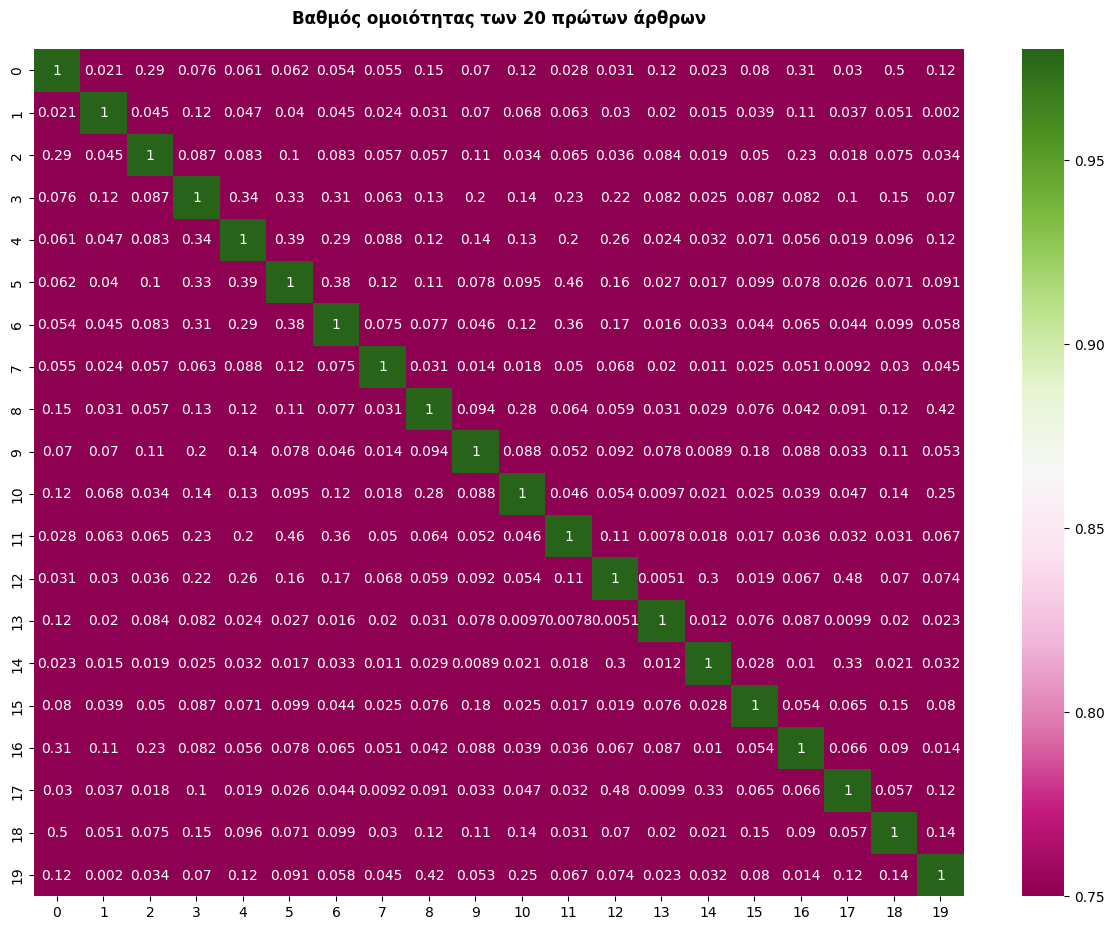

In [57]:
plt.figure(figsize=(15, 11))
plt.title('Βαθμός ομοιότητας των 20 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

In [58]:
count_tovima2 = cv.fit_transform(tovima['title'])

In [59]:
results_tovima2 = pd.DataFrame(count_tovima2.toarray(), columns=cv.get_feature_names_out())

In [60]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(tovima['title'])

In [76]:
arr = cosine_similarity(tfidf_matrix_train[0:20], tfidf_matrix_train[0:20])

<Axes: title={'center': 'Βαθμός ομοιότητας των 20 πρώτων τίτλων'}>

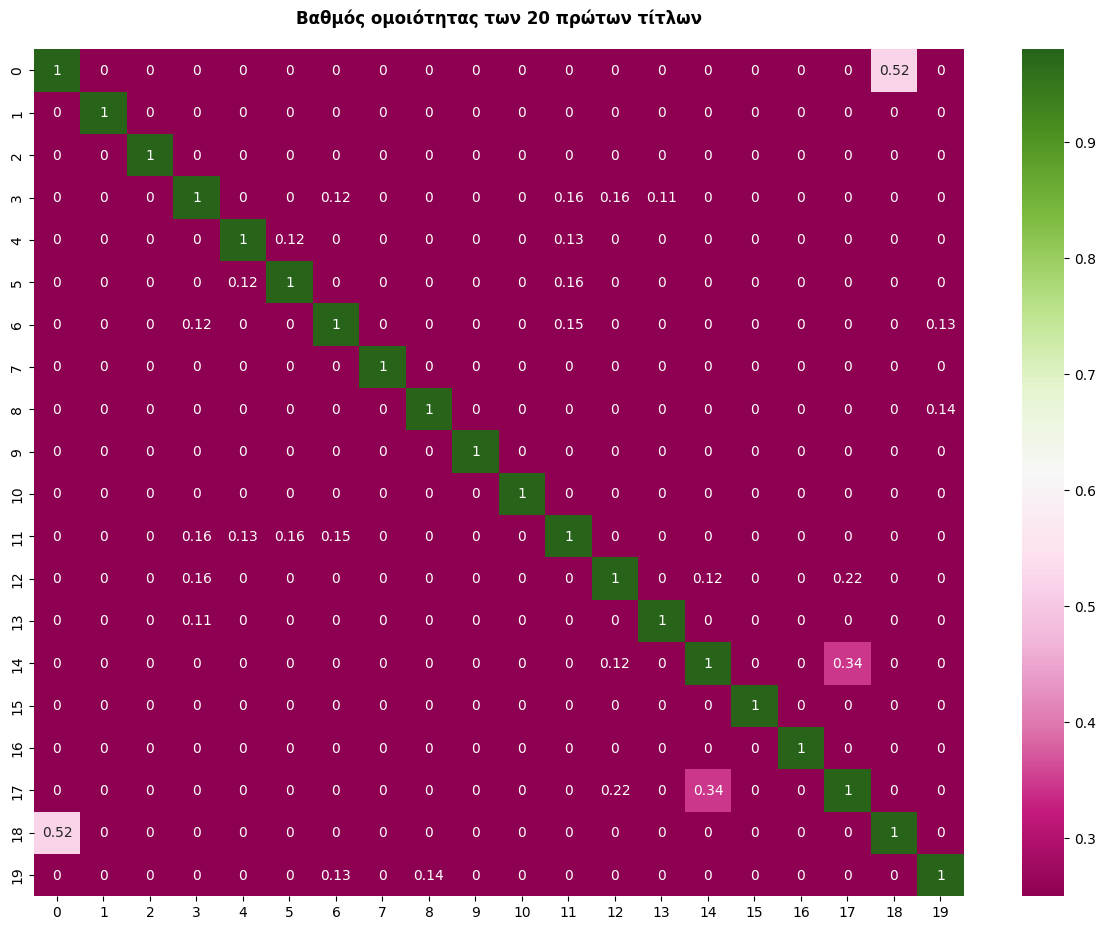

In [77]:
plt.figure(figsize=(15, 11))
plt.title('Βαθμός ομοιότητας των 20 πρώτων τίτλων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.25, vmax=0.98, cmap="PiYG")

In [113]:
tovima.loc[[0, 18]]

,site,url,section,title,datetime,author,full_text
0,tovima.gr,https://www.tovima.gr/2023/06/13/world/nato-ks...,Κόσμος,ΝΑΤΟ: Ξεκινά η μεγαλύτερη αεροπορική άσκηση σ...,13-06-2023 11:41,Newsroom,"Από σήμερα, Τρίτη, έως και τις 23 Ιουνίου στον..."
18,tovima.gr,https://www.tovima.gr/2023/06/12/world/nato-st...,Κόσμος,ΝΑΤΟ: Στη Γερμανία η μεγαλύτερη αεροπορική άσ...,12-06-2023 09:20,Newsroom,Από σήμερα έως και τις 23 Ιουνίου στον εναέριο...


In [65]:
kathimerini = pd.read_csv('/content/temp/kathimerini.gr-MAY23.csv')

In [69]:
tfidf_kathimerini = tfidf_vectorizer.fit_transform(kathimerini['text'])

In [71]:
tfidf_tovima = tfidf_vectorizer.fit_transform(tovima['full_text'])

In [78]:
arr = cosine_similarity(tfidf_tovima[0:20], tfidf_kathimerini[0:20])

<Axes: title={'center': 'Βαθμός ομοιότητας των 20 πρώτων άρθρων των δύο εφημερίδων'}>

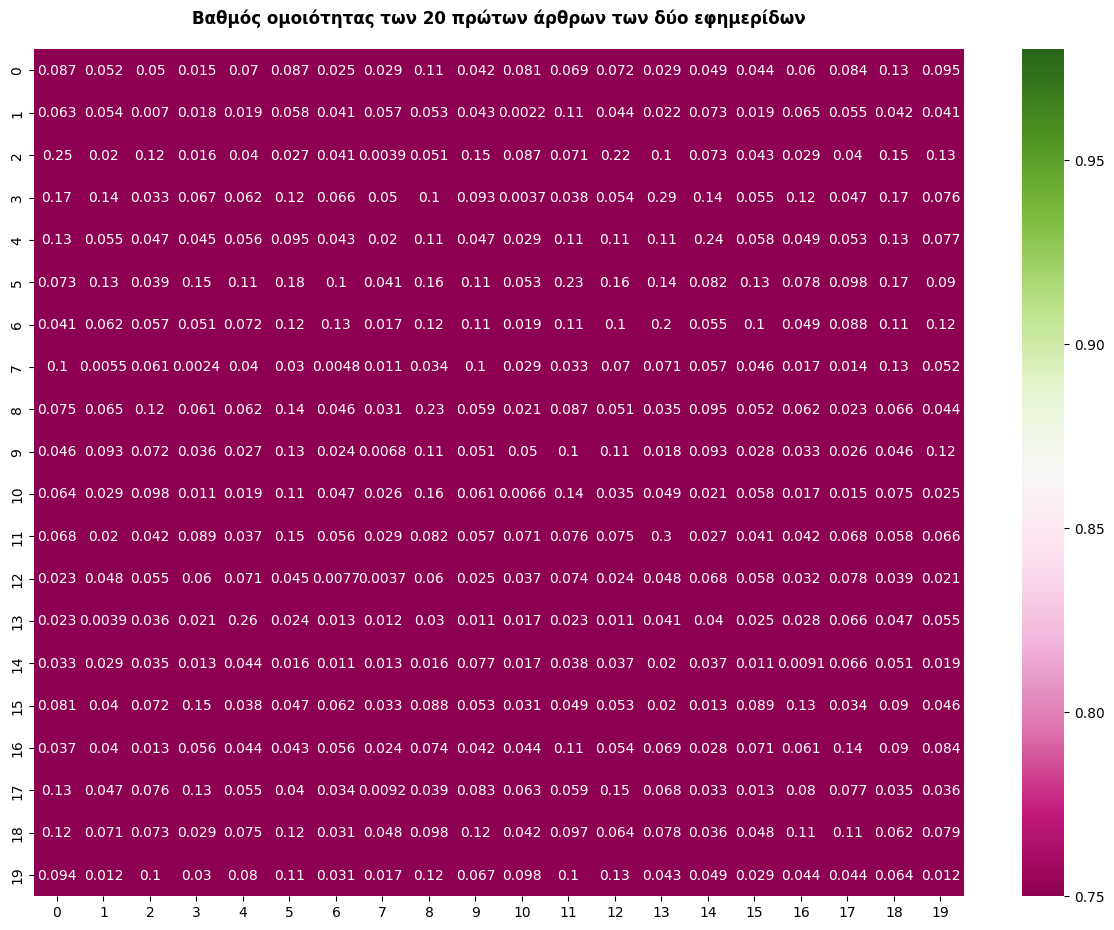

In [79]:
plt.figure(figsize=(15, 11))
plt.title('Βαθμός ομοιότητας των 20 πρώτων άρθρων των δύο εφημερίδων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

In [114]:
tovima_text = tovima['full_text'].str.cat(sep = ' ')
kathimerini_text = kathimerini['text'].str.cat(sep = ' ')

In [120]:
two_sites_list = []
tovimaD = {'site' : 'tovima.gr', 'text' : tovima_text}
two_sites_list.append(tovimaD)
kathimeriniD = {'site' : 'kathimerini.gr', 'text' : kathimerini_text}
two_sites_list.append(kathimeriniD)
two_sites_df = pd.DataFrame(two_sites_list)

In [121]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [122]:
arr2 = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: title={'center': 'Βαθμός ομοιότητας των άρθρων από το tovima.gr και το kathimerini.gr'}>

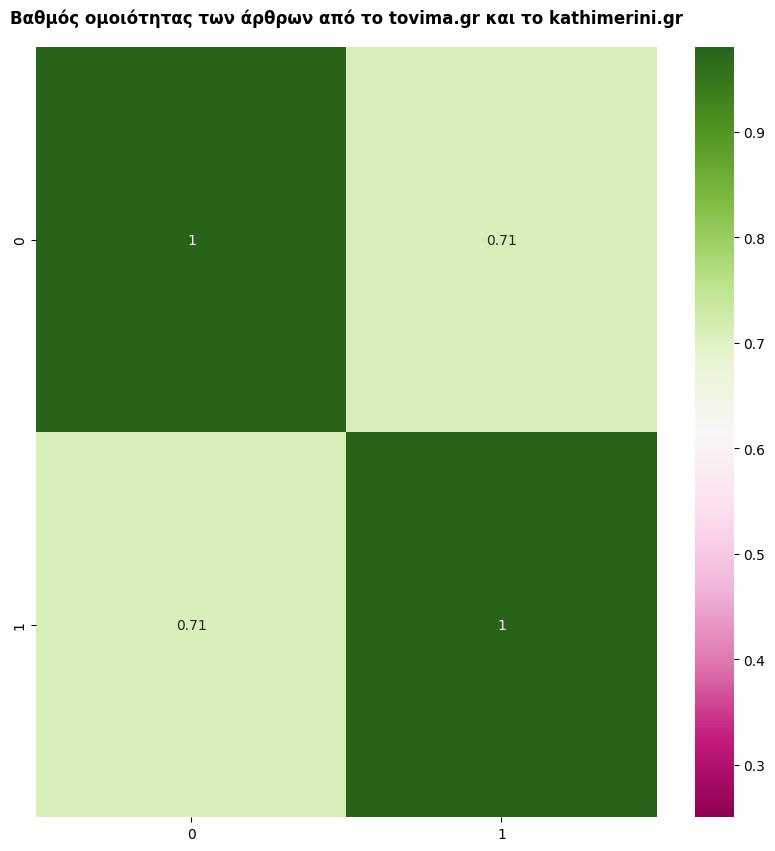

In [123]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το tovima.gr και το kathimerini.gr', y=1.02, fontweight='bold')
sns.heatmap(data=arr2, annot=True, vmin=0.25, vmax=0.98, cmap="PiYG")